In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

# 제1장 웹에서 주문수를 분석하는 테크닉 

In [2]:
import pandas as pd
import os

os.getcwd()

'/Users/yungsu2391naver.com/PythonStudy/pyda100/1장'

### 테크닉1 : 데이터를 읽어들이자

In [3]:
customer_master = pd.read_csv('./customer_master.csv')
item_master = pd.read_csv('./item_master.csv')
transaction_1 = pd.read_csv('./transaction_1.csv')
transaction_2 = pd.read_csv('./transaction_2.csv')
transaction_detail_1 = pd.read_csv('./transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('./transaction_detail_2.csv')
item_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     5 non-null      object
 1   item_name   5 non-null      object
 2   item_price  5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


### 테크닉2 : 데이터를 결합(유니언)해보자

In [14]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2],ignore_index=True)

In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  6786 non-null   object
 1   price           6786 non-null   int64 
 2   payment_date    6786 non-null   object
 3   customer_id     6786 non-null   object
dtypes: int64(1), object(3)
memory usage: 212.2+ KB


In [18]:
transaction_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   detail_id       7144 non-null   int64 
 1   transaction_id  7144 non-null   object
 2   item_id         7144 non-null   object
 3   quantity        7144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 223.4+ KB


### 테크닉3 : 매출 데이터끼리 결합(조인)해보자

In [21]:
data_join = pd.merge(transaction_detail,transaction[["transaction_id", "payment_date", "customer_id"]], how='left', on='transaction_id')
data_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### 테크닉4 : 마스터데이터를 결합(조인)해보자

In [23]:
data_join = pd.merge(data_join, item_master, how='left', on='item_id')
data_join = pd.merge(data_join, customer_master, how='left', on='customer_id')

transaction_full.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


### 테크닉5 : 필요한 데이터 컬럼을 만들자

In [25]:
data_join['price'] = data_join['item_price']*data_join['quantity']
data_join

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,PC-D,180000,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,PC-B,85000,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,PC-A,50000,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,PC-B,85000,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,85000


### 테크닉6 : 데이터를 검산하자

In [27]:
print(transaction['price'].sum())
print(data_join['price'].sum())

971135000
971135000


### 테크닉7 : 각종 통계량을 파악하자

In [34]:
# 누락된 데이터가 있는지 확인하는 쉬운 방법 => 결손치 확인이라고 함
print(data_join.isnull().sum())
data_join.describe()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
price                0
dtype: int64


,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [36]:
data_join.head(3)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000


### 테크닉8 : 월별로 데이터를 집계해보자

In [41]:
data_join['payment_date'] = pd.to_datetime(data_join['payment_date'])
data_join['payment_date_month'] = data_join['payment_date'].dt.strftime("%Y%m")

data_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price,payment_date_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000,201902


In [44]:
data_join.groupby(["payment_date_month"])[['price', 'quantity']].sum()

price  quantity
payment_date_month item_name                    
201902             PC-A       24150000       483
                   PC-B       25245000       297
                   PC-C       19800000       165
                   PC-D       31140000       173
                   PC-E       59850000       285
201903             PC-A       26000000       520
                   PC-B       25500000       300
                   PC-C       19080000       159
                   PC-D       25740000       143
                   PC-E       64050000       305
201904             PC-A       25900000       518
                   PC-B       23460000       276
                   PC-C       21960000       183
                   PC-D       24300000       135
                   PC-E       64890000       309
201905             PC-A       24850000       497
                   PC-B       25330000       298
                   PC-C       20520000       171
                   PC-D       25920000       144
                   PC-E       58800000       280
201906             PC-A       26000000       520
                   PC-B       23970000       282
                   PC-C       21840000       182
                   PC-D       28800000       160
                   PC-E       63420000       302
201907             PC-A       25250000       505
                   PC-B       28220000       332
                   PC-C       19440000       162
                   PC-D       26100000       145
                   PC-E       71610000       341

### 테크닉9 : 월별, 상품별 데이터를 집계해보자

In [46]:
data_join.groupby(["payment_date_month","item_name"])[['price', 'quantity']].sum().head(5)

price  quantity
payment_date_month item_name                    
201902             PC-A       24150000       483
                   PC-B       25245000       297
                   PC-C       19800000       165
                   PC-D       31140000       173
                   PC-E       59850000       285

### 테크닉10 : 상품별 매출 추이를 가시화해보자

In [65]:
graph_data = pd.pivot_table(data_join,index='payment_date_month', columns='item_name', values="price", aggfunc="sum")
graph_data.head()


item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_date_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


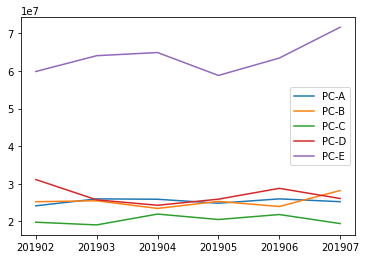

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()